In [55]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('classic')

# PLFS Workload
Clients write to different offsets of a single PLFS file. PLFS is backed by CephFS:

,clients,ts,latency,files,dirs
0,1,13:13:27,0:00:00.135461,5,3
1,2,13:14:42,0:00:00.142848,11,5
2,3,13:15:52,0:00:00.164195,20,7
3,4,13:16:52,0:00:00.141850,32,10
4,5,13:18:04,0:00:00.149736,47,13
5,6,13:19:11,0:00:00.139868,65,15


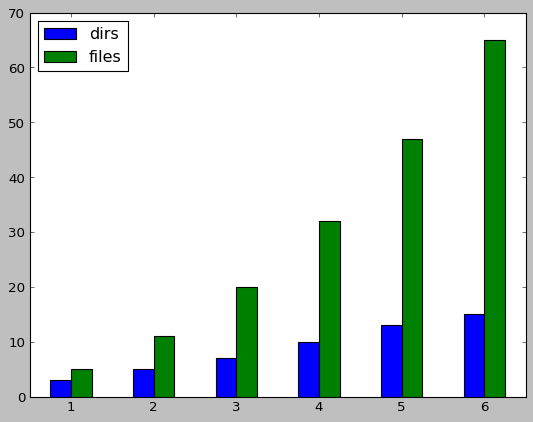

In [56]:
df = pd.read_csv("results/files.txt", names=['clients', 'ts', 'latency', 'files'])
df0 = pd.read_csv("results/dirs.txt", names=['clients', 'ts', 'latency', 'dirs'])

df['dirs'] = df0['dirs']
fig, ax = plt.subplots(1, 1)
df[['dirs', 'files']].plot.bar(ax=ax)
ax.set_xticklabels(df['clients'], rotation=0)
fig.savefig('results/namespace.png', dpi=400)
df

,handle_client_request,req_create,req_getattr,req_lookup,req_lookupname,req_mkdir,req_open,req_readdir,req_rename,req_rmdir,req_unlink
0,19.0,9.0,3.0,3.0,0.0,4.0,0.0,6.0,1.0,1.0,1.0
1,55.0,12.0,3.0,43.0,0.0,4.0,3.0,10.0,0.0,2.0,2.0
2,91.0,17.0,16.0,61.0,0.0,4.0,9.0,18.0,0.0,4.0,4.0
3,131.0,23.0,9.0,85.0,1.0,6.0,20.0,25.0,0.0,6.0,6.0
4,208.0,30.0,21.0,110.0,0.0,6.0,40.0,46.0,0.0,8.0,8.0
5,247.0,35.0,15.0,122.0,1.0,4.0,66.0,49.0,0.0,12.0,12.0


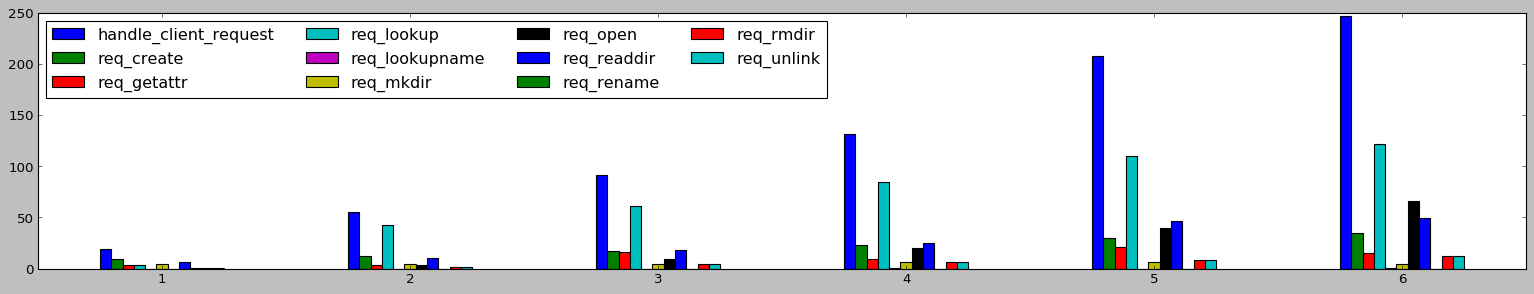

In [57]:
# get column headers
val = pd.DataFrame()
with open ("results/perfdump_" + str(1) + "_after") as f:
    data = json.load(f)
    val = json_normalize(data['mds_server'])
df = pd.DataFrame(columns=list(val))

# read in the data
for i in [1, 2, 3, 4, 5, 6]:
    with open ("results/perfdump_" + str(i) + "_after") as f:
        data = json.load(f)
        val = json_normalize(data['mds_server'])
    with open ("results/perfdump_" + str(i) + "_before") as f:
        data = json.load(f)
        val = val - json_normalize(data['mds_server'])
    df = df.append(val)
df = df.set_index([[0, 1, 2, 3, 4, 5]])

# delete things that aren't requests
del df['dispatch_client_request']
del df['dispatch_server_request']
del df['handle_client_session']
del df['handle_slave_request']
for col in list(df):
    if df[col].sum() == 0:
        del df[col]

fig, ax = plt.subplots(1, 1)
df.plot.bar(ax=ax, figsize=(24, 4))
ax.set_xticklabels([1, 2, 3, 4, 5, 6], rotation=0)
ax.legend(ncol=4, loc='upper left')
fig.savefig('results/namespace-requests.png', dpi=400)
df

# RPC Amplication

0    0.333333
1    3.583333
2    3.588235
3    3.695652
4    3.666667
5    3.485714
dtype: float64
0    0.000000
1    0.250000
2    0.529412
3    0.869565
4    1.333333
5    1.885714
dtype: float64
0    9.000000
1    6.000000
2    5.666667
3    5.750000
4    6.000000
5    5.833333
Name: req_create, dtype: float64


,handle_client_request,req_create,req_getattr,req_lookup,req_lookupname,req_mkdir,req_open,req_readdir,req_rename,req_rmdir,req_unlink
0,19.0,9.0,3.0,3.0,0.0,4.0,0.0,6.0,1.0,1.0,1.0
1,55.0,12.0,3.0,43.0,0.0,4.0,3.0,10.0,0.0,2.0,2.0
2,91.0,17.0,16.0,61.0,0.0,4.0,9.0,18.0,0.0,4.0,4.0
3,131.0,23.0,9.0,85.0,1.0,6.0,20.0,25.0,0.0,6.0,6.0
4,208.0,30.0,21.0,110.0,0.0,6.0,40.0,46.0,0.0,8.0,8.0
5,247.0,35.0,15.0,122.0,1.0,4.0,66.0,49.0,0.0,12.0,12.0


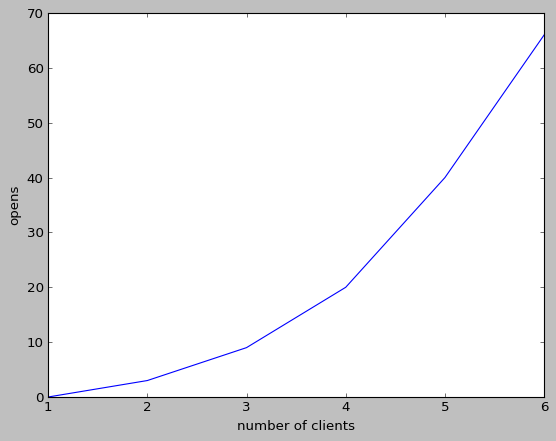

In [58]:
print df['req_lookup']/df['req_create']
print df['req_open']/df['req_create']
x = df['req_open']#/[1, 2, 3, 4, 5, 6]
print df['req_create']/[1, 2, 3, 4, 5, 6]
fig, ax = plt.subplots(1, 1)
x.plot(ax=ax)
ax.set_ylabel("opens")
ax.set_xticklabels([1, 2, 3, 4, 5, 6])
ax.set_xlabel("number of clients")
fig.savefig('results/namespace-opens-per-create.png', dpi=400)
df

# Normalized to Number of Requests

,handle_client_request,req_create,req_getattr,req_lookup,req_lookupname,req_mkdir,req_open,req_readdir,req_rename,req_rmdir,req_unlink
0,19.0,0.473684,0.157895,0.157895,0.000000,0.210526,0.000000,0.315789,0.052632,0.052632,0.052632
1,55.0,0.218182,0.054545,0.781818,0.000000,0.072727,0.054545,0.181818,0.000000,0.036364,0.036364
2,91.0,0.186813,0.175824,0.670330,0.000000,0.043956,0.098901,0.197802,0.000000,0.043956,0.043956
3,131.0,0.175573,0.068702,0.648855,0.007634,0.045802,0.152672,0.190840,0.000000,0.045802,0.045802
4,208.0,0.144231,0.100962,0.528846,0.000000,0.028846,0.192308,0.221154,0.000000,0.038462,0.038462
5,247.0,0.141700,0.060729,0.493927,0.004049,0.016194,0.267206,0.198381,0.000000,0.048583,0.048583


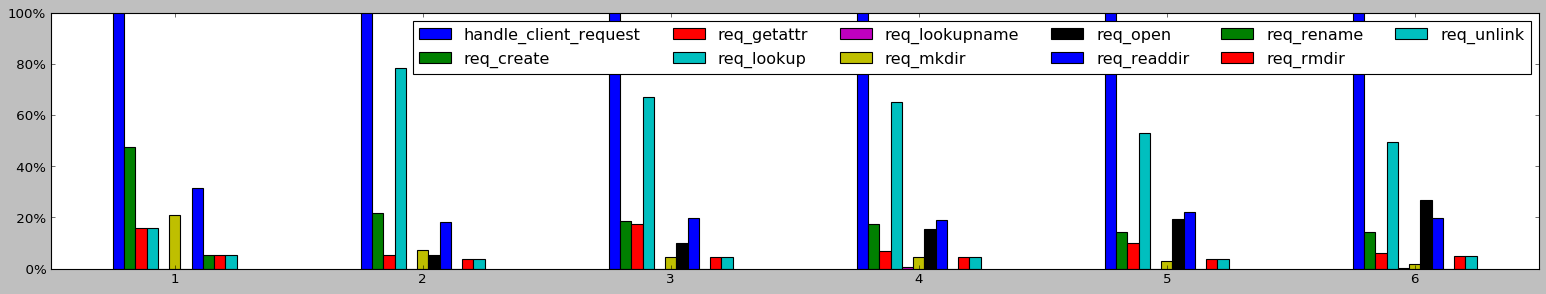

In [59]:
# normalize
for metric in list(df):
    if metric != 'handle_client_request':
        df[metric] = df[metric]/df['handle_client_request']

fig, ax = plt.subplots(1, 1)
df.plot.bar(ax=ax, figsize=(24, 4))
ax.set_xticklabels([1, 2, 3, 4, 5, 6], rotation=0)
ax.legend(ncol=6, loc='upper right')
ax.set_ylim(0, 1)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
fig.savefig('results/namespace-requests-percent.png', dpi=400)
df